# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. `Numpy`, `matplotlib`, `scipy.stats`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.

**Баллы за задание:**

<font color="blue"><b>Легкая часть</b></font> (достаточно на "хор"):
* Задача 1.1 — 3 балла
* Задача 1.2 — 3 балла
* Задача 2 — 3 балла

<font color="orange"><b>Сложная часть</b></font> (необходимо на "отл"):
* Задача 1.3 — 3 балла
* Задача 3.1 — 3 балла
* Задача 3.2 — 3 балла
* Задача 3.3 — 3 балла
* Задача 4 — 4 балла


In [5]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

### <font color="blue"><i>Легкая часть: генерация</i></font>

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [6]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = sps.bernoulli(0.5).rvs

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [7]:
coin(size=10)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [8]:
def uniform(size=1, precision=7):
    shape_to_generate = np.append(size, precision)
    factors = np.cumprod(np.ones(precision) * 0.5)
    return np.sum(coin(shape_to_generate) * factors, axis=-1)

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

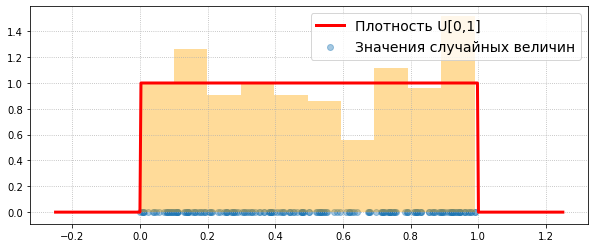

In [9]:
size = 200
grid = np.linspace(-0.25, 1.25, 500) 
sample = uniform(200, 50)

# Отрисовка графика
plt.figure(figsize=(10 ,4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4, 
    label='Значения случайных величин'
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins=10, 
    density=True, 
    alpha=0.4, 
    color='orange'
)

# рисуем график плотности
plt.plot(
    grid, 
    sps.uniform.pdf(grid), 
    color='red', 
    linewidth=3, 
    label='Плотность U[0,1]'
)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

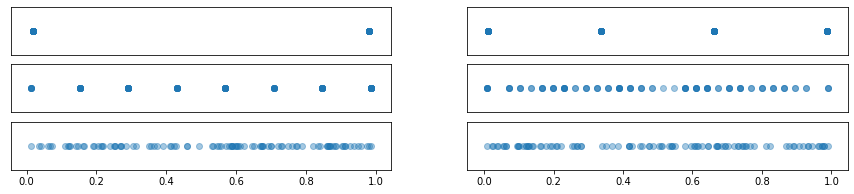

In [10]:
size = 100

plt.figure(figsize=(15, 3)) # <определите график размера 15 на 3>

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision), # <Сгенерируйте выборку размера size точности precision>
        np.zeros(size), 
        alpha=0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

Чем выше точность т.е. параметр `precision`, тем более равномерно при одном и том же размере выборки распределена $\xi \sim U[0,1]$.

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [11]:
def normal(size=1, loc=0, scale=1, precision=30):
    sample_xi = uniform(size, precision)
    sample_eta = uniform(size, precision)
    return scale * np.cos(2 * np.pi * sample_xi) * np.sqrt((-2) * np.log(sample_eta)) + loc

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

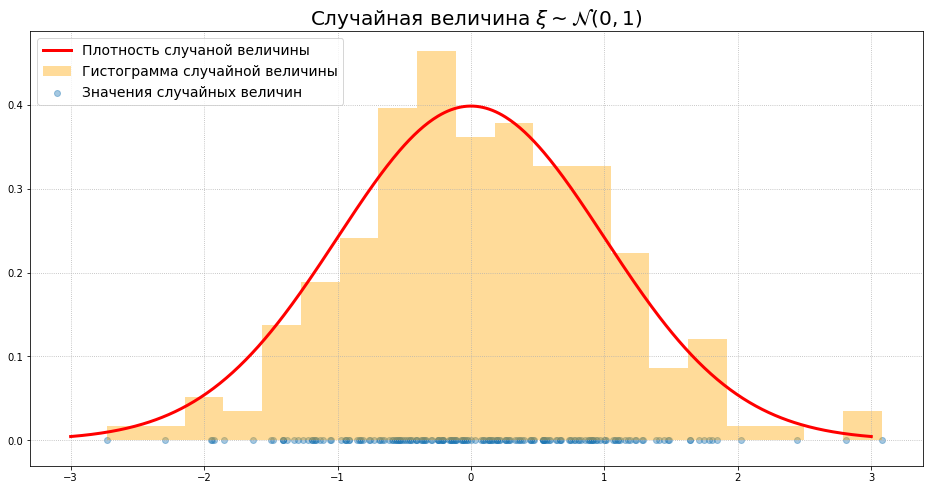

In [12]:
size = 200
grid = np.linspace(-3, 3, 500)
sample = normal(size=200, precision=50) 


plt.figure(figsize=(16 ,8)) 


plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4, 
    label='Значения случайных величин'
)


plt.hist(
    sample, 
    bins=20, 
    density=True, 
    alpha=0.4, 
    color='orange',
    label = 'Гистограмма случайной величины'
)


plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    color='red', 
    linewidth=3, 
    label='Плотность случаной величины'
)
plt.legend(fontsize=14, loc=2)
plt.title(r'Случайная величина $\xi \sim \mathcal{N}(0, 1)$', fontsize=20)
plt.grid(ls=':')
plt.show()

### <font color="orange"><i>Сложная часть: генерация</i></font>

**Часть 3.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя задачу из теории вероятностей:

*Если $\xi$ — случайная величина, имеющая абсолютно непрерывное распределение, и $F$ — ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить? Поясните ответ.

### Теорема об обратной функции 
Если функция $y=f(x)$ непрерывна и строго возрастает на отрезке $[a, b]$ , то на отрезке $[f(a), f(b)]$ определена функция $x=f^{-1}(y)$ , обратная к f, непрерывная и строго возрастающая.

### Использование
Так как функция распределения $F(x)=(1 - e^{\lambda \cdot x})\cdot I(x >0)$ $Exp(\lambda)$ непрерывна и строго монотонна на отрезке $[0, 1]$ (производная всюду положительна), то значит имеет обратную $F^{-1}(x)= -\frac{1}{\lambda}ln(1-x)$. А значит зная выборку равномерного распределения мы можем получить и выборку для экспоненциального.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [13]:
def expon(size=1, lambd=1, precision=30):
    return - np.log(1 - uniform(size, precision)) / lambd


Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

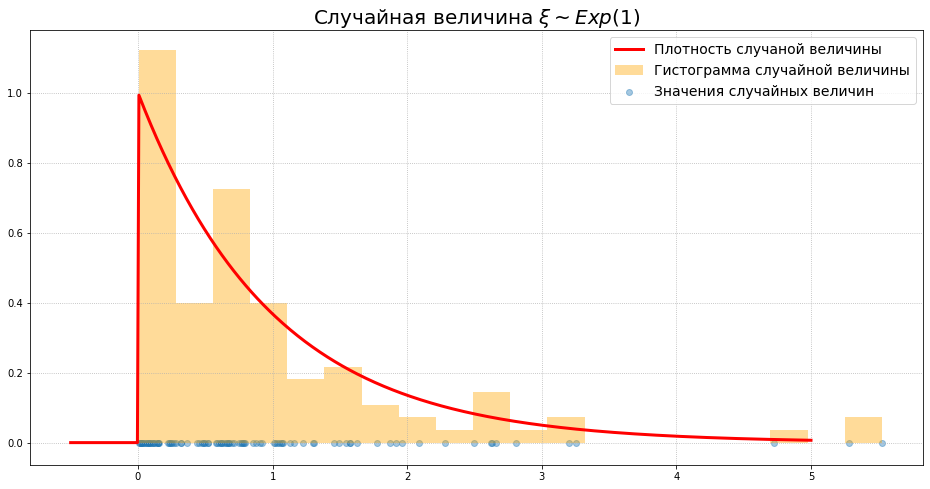

In [14]:
size = 100
grid = np.linspace(-0.5, 5, 500)
sample = expon(size=size, precision=50) 


plt.figure(figsize=(16 ,8)) 


plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4, 
    label='Значения случайных величин'
)


plt.hist(
    sample, 
    bins=20, 
    density=True, 
    alpha=0.4, 
    color='orange',
    label = 'Гистограмма случайной величины'
)


plt.plot(
    grid, 
    sps.expon.pdf(grid), 
    color='red', 
    linewidth=3, 
    label='Плотность случаной величины'
)
plt.legend(fontsize=14, loc=1)
plt.title(r'Случайная величина $\xi \sim Exp(1)$', fontsize=20)
plt.grid(ls=':')
plt.show()

**Вывод по задаче:**

Имея фукнцию, которая генерирует выборку равномерного распределения $U[0, 1]$, можно моделировать нормальное $\mathcal{N}(a, \sigma ^ 2)$, а так же экспоненциальное $Exp(\lambda)$, а фукнцию для генерации выборки из нормального распределения можно получить умея генерировать выборки из $Bern(\frac{1}{2})$. На самом деле, глобально с помощью выборки из равномерного распределения мы можем генерировать выборки для любых распределений функция распределения которых имеет обратную пользуясь утверждением из Части 3.

### <font color="blue"><i>Легкая часть: матричное умножение</i></font>

### Задача 2
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

### Numpy array broadcasting
1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

Пусть размеры матрицы A – $n\times m$, B – $m \times k$. В нашем случае делаю `reshape` A, после этого shape копии $n \times m \times 1$. Дальше работают правила *array broadcating*, shape B условно становится $1 \times m \times k$. После у обоеих происходит апскейл и обе становятся $n \times m \times k$. 

In [15]:
def matrix_multiplication(A, B):
    return np.sum(A.reshape(A.shape + (1,)) * B, axis=1)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [16]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

7.638334409421077e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [17]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [18]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B) 

CPU times: user 87 ms, sys: 70.2 ms, total: 157 ms
Wall time: 164 ms
CPU times: user 4.76 ms, sys: 3.44 ms, total: 8.2 ms
Wall time: 9.57 ms
CPU times: user 4.22 ms, sys: 504 µs, total: 4.73 ms
Wall time: 1.37 ms
CPU times: user 18.3 s, sys: 18.1 ms, total: 18.4 s
Wall time: 17.9 s
CPU times: user 15.2 ms, sys: 531 µs, total: 15.7 ms
Wall time: 16.6 ms


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [19]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    C = np.sum(A.reshape(A.shape + (1,)) * B, axis=1)
    
    return C

### <font color="orange"><i>Сложная часть: броуновское движение</i></font>

### Задача 3

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [20]:
def brownian_motion(sigma=1, T=5, grid_size=200, dimensions=2, particles_count=1):
    grid = np.linspace(0, T, grid_size)
    sqrt_delta_t = np.sqrt(T / grid_size)
    
    increments = sps.norm.rvs(
        size=(particles_count, dimensions, grid_size),
        loc=0, 
        scale=sigma * sqrt_delta_t
    )
    
    increments[:, :, 0] = 0
    return np.cumsum(increments, axis=2)


**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

In [21]:
def visualize_brownian_2d(sigma, T, grid_size, particles_count):
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches(15, 8)
    
    fig.suptitle(
        'Броуновское движение 6 частиц при $\sigma$ = {}'.format(sigma),
        fontsize=20
    )

    sample = brownian_motion(
        sigma, 
        T, 
        grid_size,
        dimensions=2, 
        particles_count=particles_count
    )
    
    for i, ax in enumerate(axes.flat):
        ax.set_aspect('equal')
        ax.plot(
            sample[i, 0],
            sample[i, 1]
        )
        ax.set_title('Частица {}'.format(i + 1))

    plt.show()

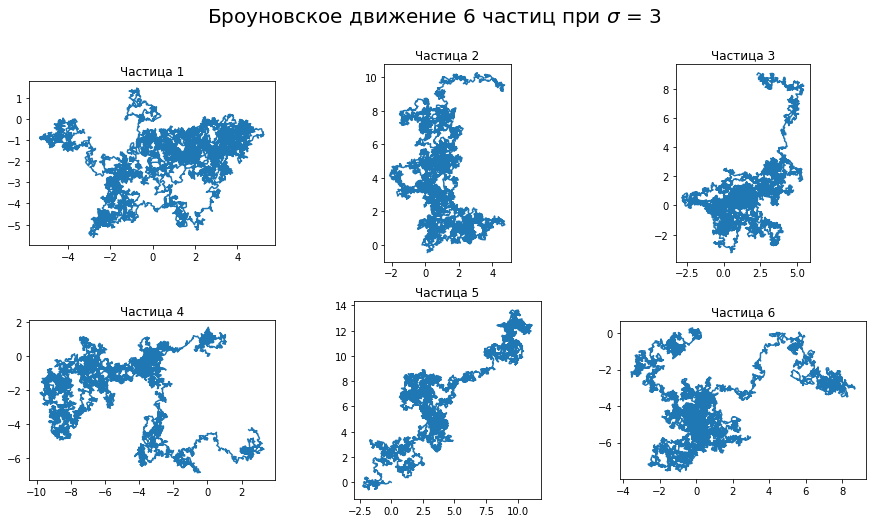

In [22]:
visualize_brownian_2d(sigma=3, T=5, grid_size=10000, particles_count=6)

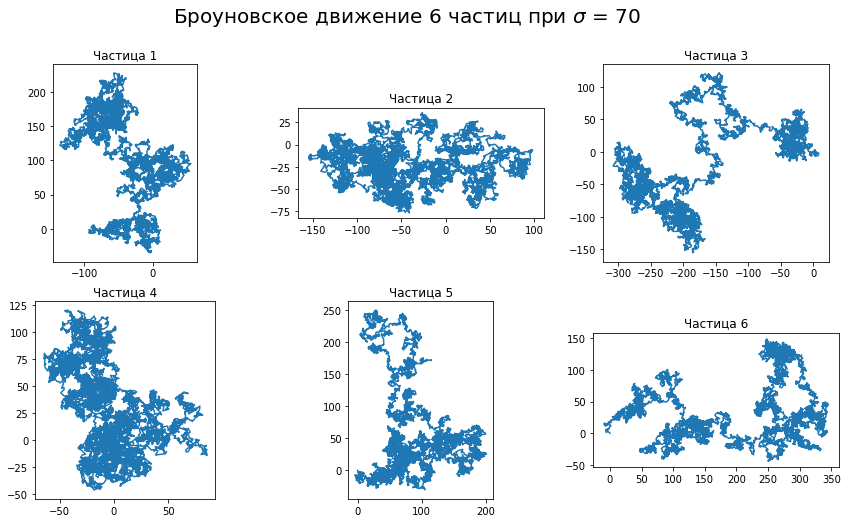

In [23]:
visualize_brownian_2d(sigma=70, T=5, grid_size=10000, particles_count=6)

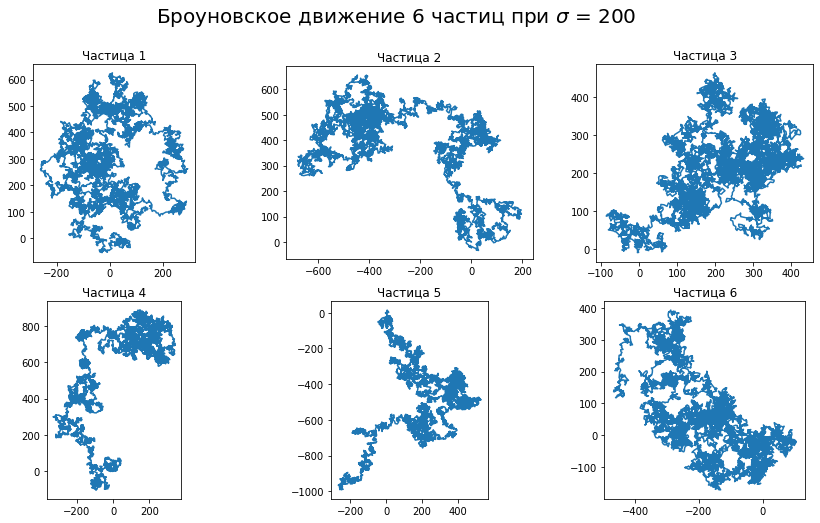

In [24]:
visualize_brownian_2d(sigma=200, T=5, grid_size=10000, particles_count=6)

Как вид траектории зависит от $\sigma$?

При больших значениях $\sigma$ абсолютное максимальное расстояние, на которое удаляется частица от начала координат увеличивается.

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

In [25]:
def visualize_brounian_3d(sigma, T, grid_size):
    fig = plt.figure()
    fig.set_size_inches(15, 8)
    fig.suptitle('Броуновское движение частицы 3D при $\sigma$ = {}'.format(sigma), fontsize=20)

    sample = brownian_motion(sigma, T, grid_size, dimensions=3, particles_count=1)
    ax = Axes3D(fig)
    ax.plot(sample[0, 0], 
            sample[0, 1],
            sample[0, 2])
    plt.show()

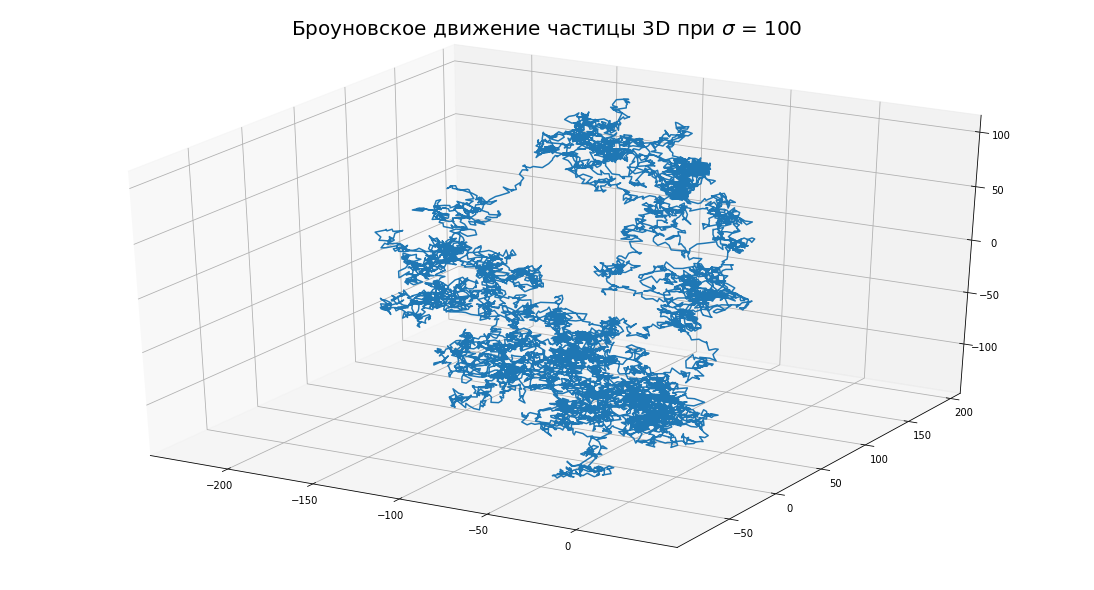

In [26]:
visualize_brounian_3d(sigma=100, T=5, grid_size=10000)

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

### Решение
Сначала напишем функцию, которая принимает матрицу result[i, j, k], которую мы генерируем фукнцией `brownian motion`, и вычисляет среднее расстояние среди всех частиц в каждый момент времени, то есть в концах промежутков $\Delta t$. Тогда после этого мы сможем построить графики зависимости среднего расстояния от времени, а потом посмотреть как при разных параметрах $\sigma$ меняется все то же отношение среднее расстояние/время и понять зависимость от $\sigma$.

Хочется отметить, что для всех эксперимернтов мы берем `T = 100`, а количество интервалов, на которое разбиваем этот промежуток времени т.е. `grid_size = 10000`. А размер выборки, то есть количество различных частиц, среднее расстояние от начала координат до которых мы исследуем возьмем равным `particles_count = 200`. Все эти параметры в течении следующих экспериментов не меняются.

In [27]:
OVERALL_TIME = 100
GRID_SIZE = 10000
SAMPLE_SIZE = 200

In [28]:
def find_mean_distance_grid(sigma, dimensions: int) -> np.array:
    
    brownian_sample = brownian_motion(sigma = sigma, 
                                      T = OVERALL_TIME, 
                                      grid_size = GRID_SIZE, 
                                      dimensions = dimensions,
                                      particles_count = SAMPLE_SIZE)
    
    mean_dist_to_time_grid = np.mean(np.sqrt(np.sum(brownian_sample ** 2, axis=1)), axis=0)
    
    return mean_dist_to_time_grid

In [29]:
def show_time_to_mean_vardim(steps: int = GRID_SIZE, 
                              overall_time: int = OVERALL_TIME,
                              dimension: int = 2,
                              sigma = 1):
    
    time_grid = np.linspace(0, overall_time, steps)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Зависимость среднего расстояния ' +
        'от времени при разных размерностях, ' +
        '$\sigma$ = {}'.format(sigma), 
        fontsize=20
    )
    
    axis.set_xlabel('Время', fontsize=15)
    axis.set_ylabel('Среднее расстояние от начала координат', fontsize=12)
    axis.grid()
    
    for cur_dimension in range(2, 15, 3):
        axis.plot(
            time_grid, 
            find_mean_distance_grid(sigma = sigma, 
                                    dimensions = cur_dimension),
            label='Размерность {}'.format(cur_dimension)
        )

    axis.legend()
    plt.show()
    return 

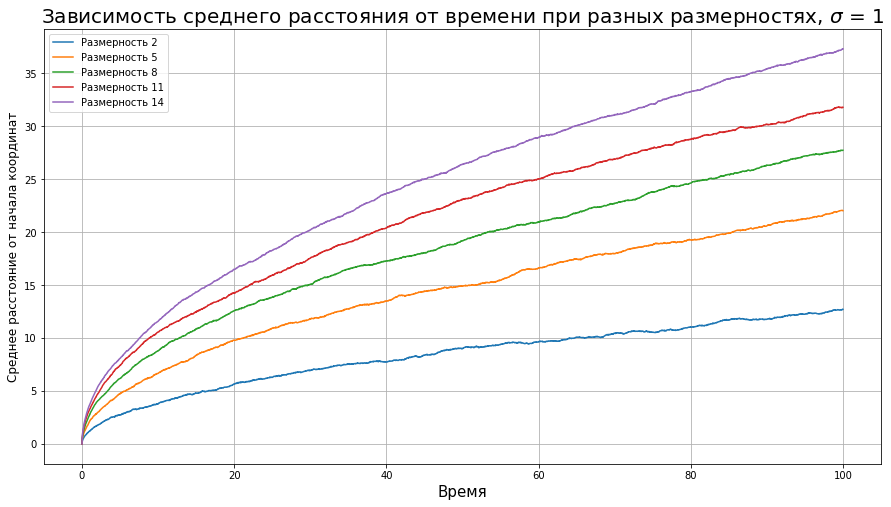

In [30]:
show_time_to_mean_vardim()

Зависимость при фиксированных $\sigma$ и `dim` похожа больше на $Сx^n$ где $n \in (0; 1)$, где `С` - некая константа. А при фиксированном $\sigma$ и увеличении размерности константа `C` увеличивается, так как в каждый конкретный момент времени среднее расстояние становится больше.

In [31]:
def show_time_to_mean_varsigma(steps: int = GRID_SIZE, 
                                   overall_time: int = OVERALL_TIME, 
                                   dimension: int = 2,
                                   sigma = 1):
    
    time_grid = np.linspace(0, overall_time, steps)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Зависимость среднего расстояния ' +
        'от времени при разных ' +
        '$\sigma$, dim = {}'.format(dimension),
        fontsize = 20
    )
    
    axis.set_xlabel('Время', fontsize=15)
    axis.set_ylabel('Среднее расстояние от начала координат', fontsize=12)
    axis.grid()
    
    for cur_sigma in range(1, 15, 3):
        axis.plot(
            time_grid, 
            find_mean_distance_grid(sigma = cur_sigma, 
                                    dimensions = dimension),
            label=r'$\sigma = $ {}'.format(cur_sigma)
        )

    axis.legend()
    plt.show()
    return 

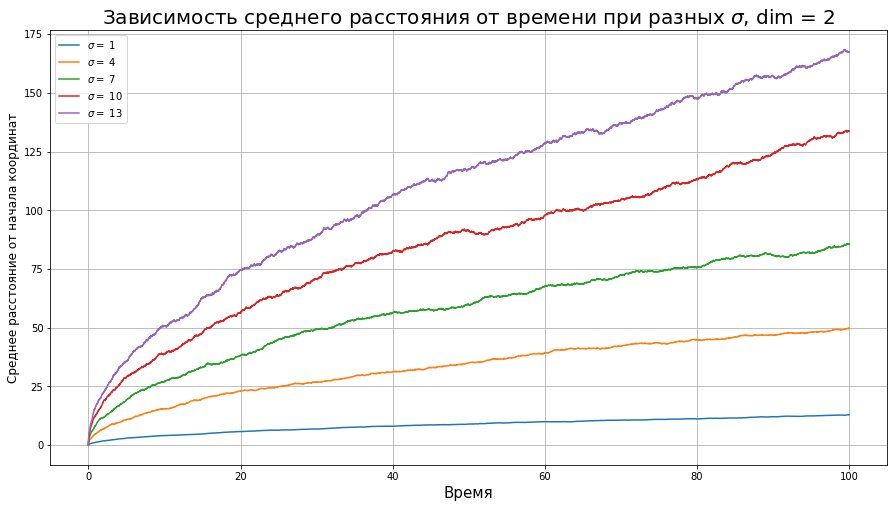

In [32]:
show_time_to_mean_varsigma()

Можно заметить, что при увеличении параметра $\sigma$, и фиксированной размерности `dim = 2` среднее расстояние в каждый конкретный момент времени становится больше, причем зависимость при каждом $\sigma$ похожа, на первый взгляд, так же на $Cx^n$, $n \in (0,1)$, где `C` - это какая-то константа.

Построим теперь при разных фиксированных размерностях графики зависимости среднего расстояния от времени при разных $\sigma$.

In [33]:
def show_time_to_mean_varall(steps: int = GRID_SIZE, 
                                     overall_time: int = OVERALL_TIME,
                                     dimension: int = 2,
                                     sigma = 1):
    
    time_grid = np.linspace(0, overall_time, steps)
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches(16, 10)
    
    for cur_dimension, axis in enumerate(axes.flat) :

        axis.set_title(
            'dim = {}'.format((cur_dimension + 1) * 3),
            fontsize = 10
        )
        axis.set_xlabel('Время', fontsize=8)
        axis.set_ylabel('Среднее расстояние', fontsize=8)
        axis.grid()

        for cur_sigma in range(1, 15, 3):
            axis.plot(
                time_grid, 
                find_mean_distance_grid(sigma = cur_sigma, 
                                        dimensions = (cur_dimension + 1) * 3),
                label=r'$\sigma = $ {}'.format(cur_sigma)
            )
        axis.legend()
        
    plt.show()
    return 

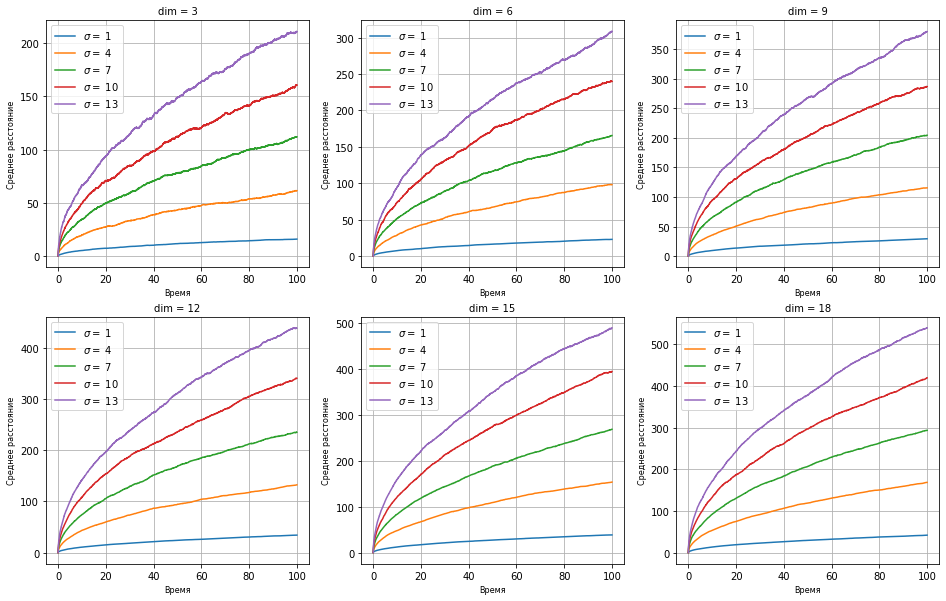

In [34]:
show_time_to_mean_varall()

**Итог**: зависимость `среднее расстояние/время` при каждых фиксированных $\sigma$ и `dim` похожа на $ f(x) = C(\sigma, dim) \cdot x^n$, где $n \in (0,1)$. Причем из графиков видно, что `C` каким-то образом зависит от $\sigma$ и `dim`, но кроме как сказать, что при увеличении соотвествующих параметров эта константа растет, ничего большего из представленных исследований заключить не могу. Найти эту зависимость (по крайней мере сейчас) не представляется возможным, так как не владею нужным аппаратом.

### <font color="orange"><i>Сложная часть: визуализация распределений</i></font>

### Задача 4

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

Далее всегда будем использовать константы – 
1. Размер выборки `SAMPLE_SIZE` $= 300$.

In [35]:
SAMPLE_SIZE = 300

## Распределение Бернулли
Распределение Бернулли $Bern(p)$ — дискретное распределение с одним параметром - вероятностью успеха. Принимает два значения – либо 1, либо 0 с вероятностями $p$ и $1 - p$.

In [36]:
def show_bern_pmf():
    grid = np.array([0, 1])
    p_values = [1/5, 3/8, 1/2, 3/4]
    fig, axes = plt.subplots(2, 2)
    fig.set_size_inches(16, 10)
    
    fig.suptitle(
        'Графики функции массы распределения Бернулли $Bern(p)$',
        fontsize=18
    )
    
    for i, axis in enumerate(axes.flat):
        axis.set_title(
            'p = {}'.format(p_values[i]),
            fontsize = 15
        )
        
        axis.scatter(
            grid, 
            sps.bernoulli(p_values[i]).pmf(grid),
            color='r'
        )
                
        axis.grid()
        
    
    plt.show()
    return  

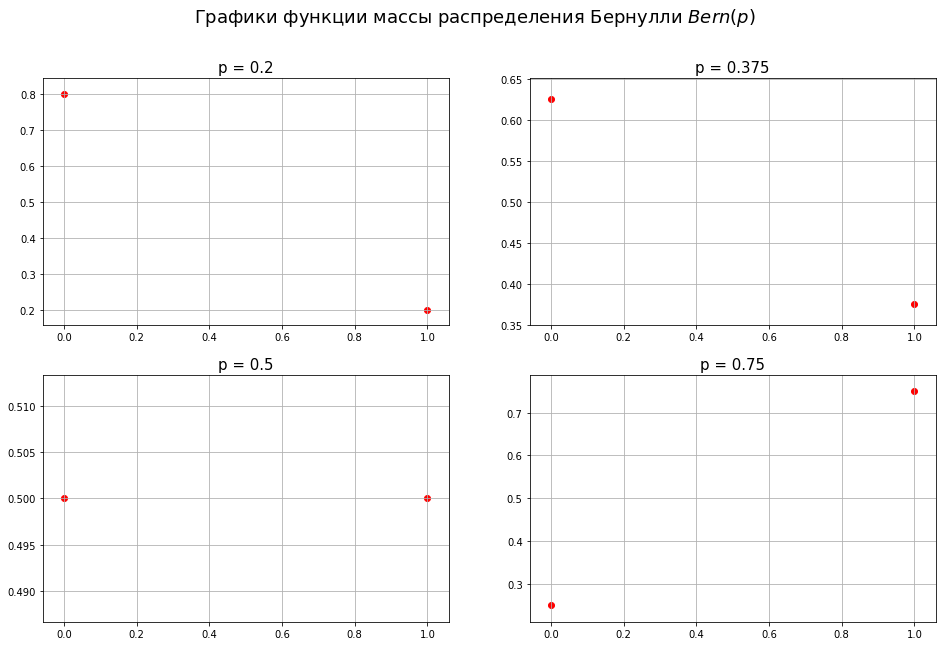

In [37]:
show_bern_pmf()

In [38]:
def show_bern_hist(p: float):
    grid = np.array([0, 1])
    sample = sps.bernoulli(p).rvs(SAMPLE_SIZE)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 7)
    
    axis.set_title(
        'Распределение $Bern$' + '({})'.format(p),
        fontsize = 20
    )
    
    axis.hist(
        sample,
        density=True, 
        alpha= 0.6,
        label= 'Гистограмма случайной величины'
    )
    
    axis.scatter(
        sample, 
        np.zeros(SAMPLE_SIZE), 
        color='g',
        label='Значения случайных величин'
    )
    
    
    axis.scatter(
        grid, 
        sps.bernoulli(p).pmf(grid),
        color='r',
        label='Функция массы $Bern({})$'.format(p)
    )
                
    axis.grid()
        
    axis.legend()
    plt.show()
    return  

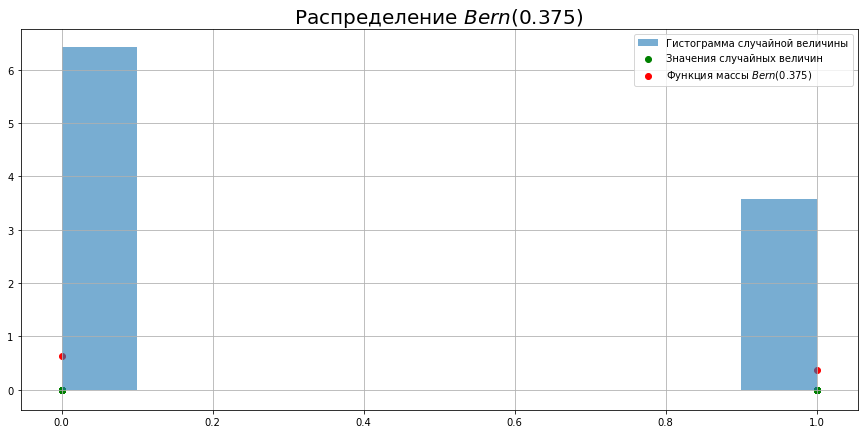

In [39]:
show_bern_hist(p=3/8)

**Вывод**: единственный параметр распределения Бернулли отвечает, как и было сказано ранее, за вероятность успеха. Хоть это распределение и довольно простое, но по опыту 1-ого задания мы понимаем, что с помощью него можно генерировать много других распределений.

## Биномиальное распределение 
Биномиальное распределение $Bin(n, p)$ — распределение количества успехов в последовательности из n
независимых случайных экспериментов, где в каждом вероятность успеха равна $p$.

In [40]:
def show_bin_pmf():
    n_values = [50, 50, 50, 20, 40, 50]
    p_values = [1/5, 3/4, 1/2, 1/5, 0.05, 0.99]
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches(16, 10)
    
    fig.suptitle(
        'Графики функции массы биномиального распределения $Bin(n, p)$',
        fontsize=18
    )
    
    for i, axis in enumerate(axes.flat):
        grid = np.arange(0, n_values[i] + 1)
        axis.set_title(
            'n = {}, p = {}'.format(n_values[i], p_values[i]),
            fontsize = 15
        )
        
        axis.scatter(
            grid, 
            sps.binom(n_values[i], p_values[i]).pmf(grid),
            color='r', 
            lw=0.1
        )
                
        axis.grid()
        
    
    plt.show()
    return  

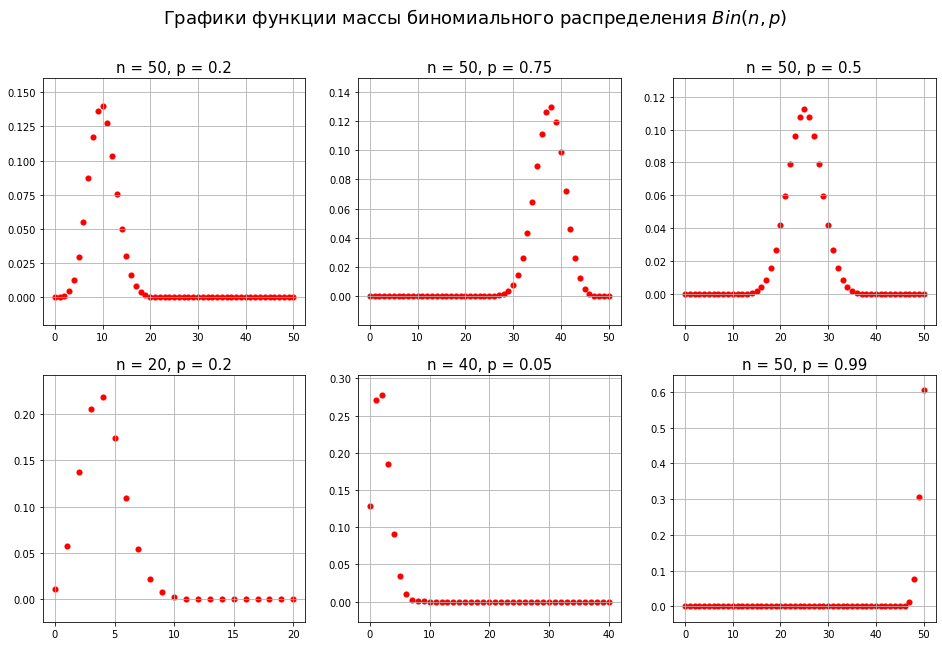

In [41]:
show_bin_pmf()

In [42]:
def show_binom_hist(n: int, p: float):
    grid = np.arange(0, n + 1)
    sample = sps.binom(n, p).rvs(SAMPLE_SIZE)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 7)
    
    axis.set_title(
        'Распределение $Bin$' + '({}, {})'.format(n, p),
        fontsize = 20
    )
    
    axis.hist(
        sample,
        density=True, 
        alpha= 0.6,
        label='Гистограмма случайной величины'
    )
    
    axis.scatter(
        sample, 
        np.zeros(SAMPLE_SIZE), 
        color='g',
        label='Значения случайных величин'
    )
    
    axis.scatter(
        grid, 
        sps.binom(n, p).pmf(grid),
        color='r',
        label='График фукнции массы Bin({}, {})'.format(n, p)
    )
                
    axis.grid()
    axis.legend()
    
    plt.show()
    return  

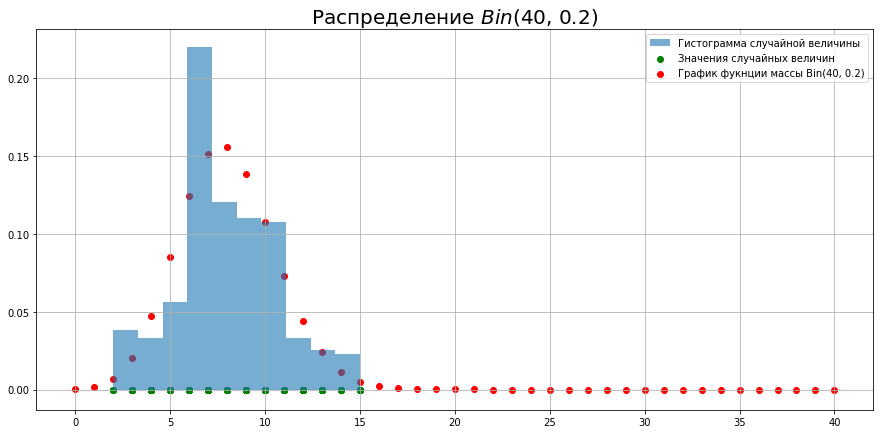

In [43]:
show_binom_hist(40, 0.2)

**Вывод**: параметр `p` при увеличении так же увеличивает и значение, которое принимается с наибольшей вероятностью, а параметр `n` влияет на количество исходов, так же хочется упомять, что из графиков видно, что даже при большом росте `n` количество значений с высокой вероятностью выигрыша увеличивается не сильно.

## Дискретное равномерное распределение
Является  дискретным равномерным распределением с параметрами $(a, b)$, где `а` - целое число начало "отрезка", а `b` – конец, принимает конечное число – `n` $ = b - a$ значений с равными вероятностями `1/n`.

In [44]:
def show_randint_pmf():
    a_b_values = [(1, 5), (2, 10), (-5, 15), (1, 3)]
    fig, axes = plt.subplots(2, 2)
    fig.set_size_inches(16, 10)
    
    fig.suptitle(
        'Графики функции массы равномерного дискретного распределения',
        fontsize=18
    )
    
    for i, axis in enumerate(axes.flat):
        grid = np.arange(a_b_values[i][0] - 1, a_b_values[i][1] + 1)
        
        axis.set_title(
            'a = {}, b = {}'.format(a_b_values[i][0], a_b_values[i][1]),
            fontsize = 15
        )
        axis.scatter(
            grid, 
            sps.randint(a_b_values[i][0], a_b_values[i][1]).pmf(grid),
            color='r',
            lw=0.1
        )
                
        axis.grid()
        
    
    plt.show()
    return  

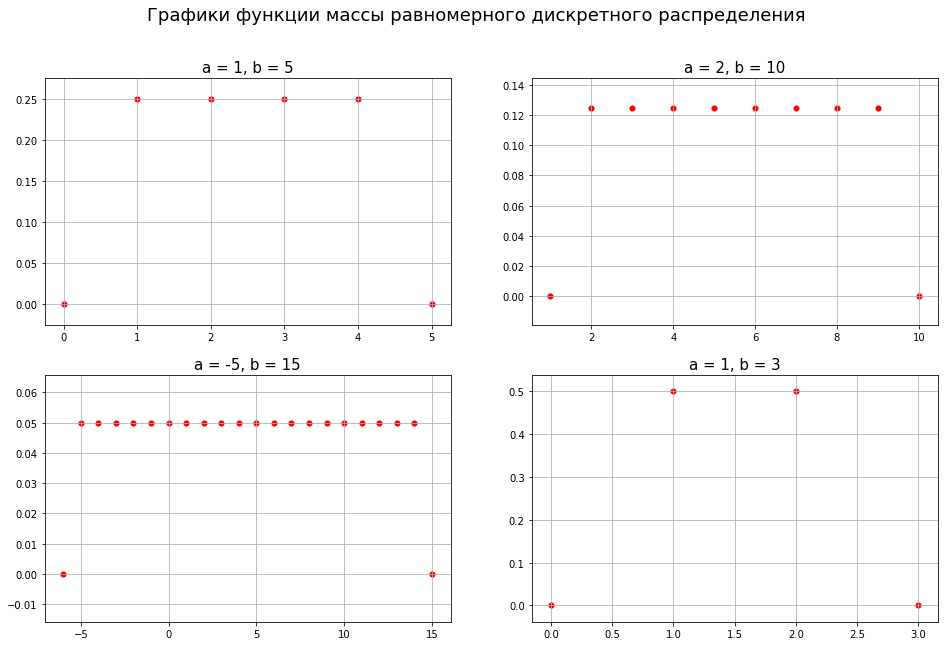

In [45]:
show_randint_pmf()

In [46]:
def show_randint_hist(a: int, b: int):
    grid = np.arange(a - 1, b + 1)
    sample = sps.randint(a, b).rvs(SAMPLE_SIZE)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Распределение равномерное дискретное' + '({}, {})'.format(a, b),
        fontsize = 20
    )
    
    axis.hist(
        sample,
        density=True, 
        alpha= 0.6,
        label='Гистограмма случайной величины'
    )
    
    axis.scatter(
        sample, 
        np.zeros(SAMPLE_SIZE), 
        color='g',
        label='Значения случайных величин'
    )
    
    
    axis.scatter(
        grid, 
        sps.randint(a, b).pmf(grid),
        color='r',
        label = 'Функция массы $U$ {' + 
                '{}, {}'.format(a, b) + '}'
    )
                
    axis.grid()
    axis.legend()
    
    plt.show()
    return  

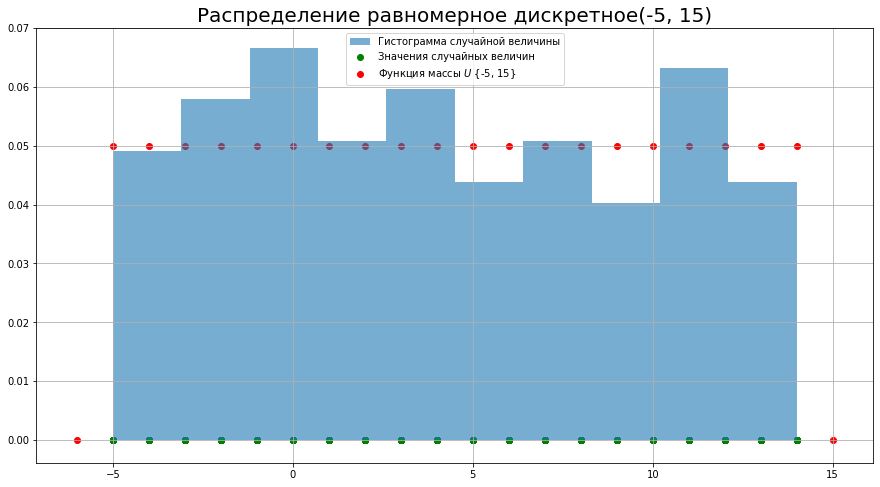

In [47]:
show_randint_hist(a = -5, b = 15)

**Вывод**: параметры `a` и `b` отвечают за промежуток значений, которые может принимать случайная величина, причем `scipy` не включает правую границу, то есть значений, которые принимает $U\{a, b\}$ ровно `b - a`. При увеличении длины интервала соотвественно, вероятность, с которой принимается каждое конкретное значение, уменьшается.

## Геометрическое распределение 

Геометрическое распределение $Geom(p)$ - дискретное распределение, которое является распределением вероятности первого успеха в схеме испытаний Бернулли, где в каждом эксперименте вероятность успеха равна `p`. И определена на множестве $\{1, 2, 3, 4, ... \}$.

In [48]:
def show_geom_pmf():
    p_values = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches(16, 10)
    
    fig.suptitle(
        'Графики функции массы геометрического распределения',
        fontsize=18
    )
    
    for i, axis in enumerate(axes.flat):
        grid = np.arange(0, 40)
        
        axis.set_title(
            'p = {}'.format(p_values[i]),
            fontsize = 15
        )
        axis.scatter(
            grid, 
            sps.geom(p_values[i]).pmf(grid),
            color='r',
            lw=0.1
        )
                
        axis.grid()
        
    
    plt.show()
    return  

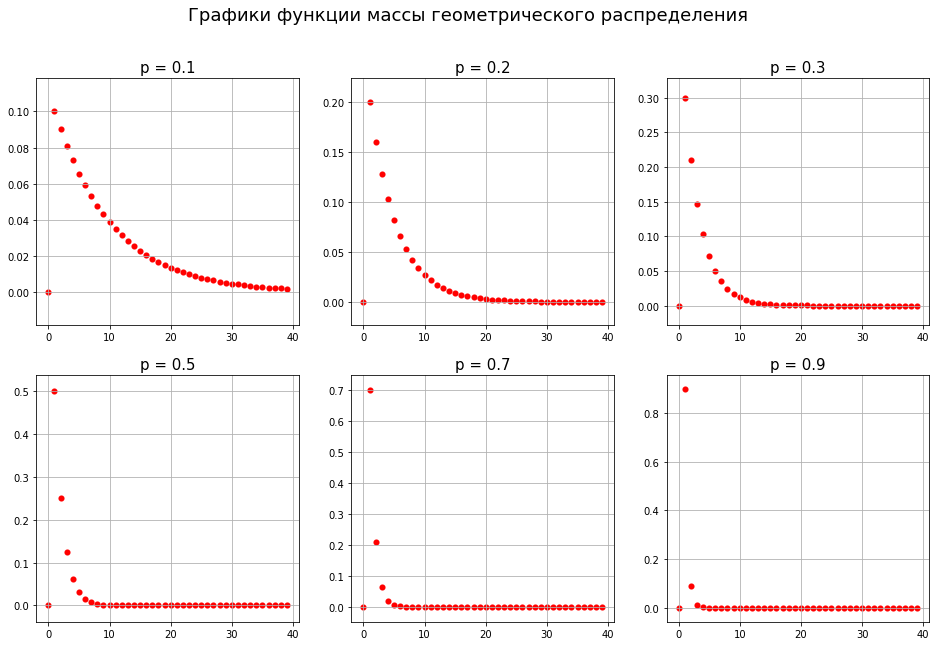

In [49]:
show_geom_pmf()

In [50]:
def show_geom_hist(p: float):
    grid = np.arange(0, 40)
    sample = sps.geom(p).rvs(SAMPLE_SIZE)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Геометрическое распределение $Geom$ ({})'.format(p),
        fontsize = 20
    )
    
    axis.hist(
        sample,
        density=True, 
        alpha= 0.6,
        label='Гистограмма случайной величины'
    )
    
    axis.scatter(
        sample, 
        np.zeros(SAMPLE_SIZE), 
        color='g',
        label='Значения случайных величин'
    )
    
    
    axis.scatter(
        grid, 
        sps.geom(p).pmf(grid),
        color='r',
        label = 'Функция массы $Geom$ ({})'.format(p)
    )
                
    axis.grid()
    axis.legend()
    
    plt.show()
    return  

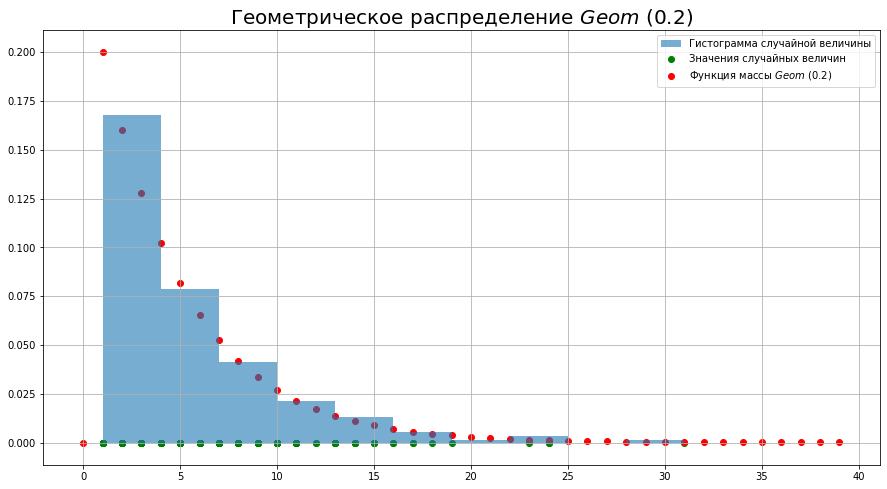

In [51]:
show_geom_hist(p = 0.2)

**Вывод**: из графиков видно, что единсвтенный параметр `p` отвечает за пологость графика, чем больше `p`, тем более явно наблюдается выпуклость графика вниз, и вместе с этим увеличивается количество значений, для которых вероятность их принять "близка" к 0. А так же с такой же вероятностью `p` принимается значение 1.